In [1]:
from tensorflow import keras

In [2]:
## importing a fashion dataset
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
y_train_full.dtype

dtype('uint8')

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
## creating a validation set as well as scaling the values. This is necessary since the neural networks depend on the gradient descent and it needs scaling
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000] , y_train_full[5000:]

In [7]:
## creating model using Sequential API -- WAY 1
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [8]:
## creating model using sequential API -- WAY 2
# model = keras.models.Sequential()
# model.add(keras.layers.Flatten(input_shape=[28,28]))
# model.add(keras.layers.Dense(300, activation = 'relu'))
# model.add(keras.layers.Dense(100, activation = 'relu'))
# model.add(keras.layers.Dense(10,activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
## getting the layers of the model
model.layers

In [11]:
## getting the names of the layers
model.layers[1].name

'dense'

In [12]:
model.layers[2].name

'dense_1'

In [13]:
## accessing the weights and biases of the layers
weights, biases = model.layers[1].get_weights()

In [14]:
weights

array([[ 5.5528268e-02,  6.7301556e-02, -1.0228477e-02, ...,
         2.0503931e-02,  2.7838178e-02,  2.0309649e-02],
       [ 9.6960217e-03,  3.5125583e-02,  5.0469302e-02, ...,
         4.3769553e-02, -6.1443128e-02,  7.4078709e-02],
       [ 5.7917744e-02, -1.5454408e-02, -6.1137170e-02, ...,
        -1.3807572e-02,  1.0646284e-03,  2.7912676e-02],
       ...,
       [ 1.4670394e-02,  4.8368163e-02, -1.6443007e-02, ...,
        -7.1253136e-02,  1.9029506e-02, -1.7177053e-02],
       [ 1.4102779e-02,  9.9509954e-05, -6.4814672e-02, ...,
        -5.7039119e-02,  2.6000895e-02, -4.0496867e-02],
       [-2.2915054e-02,  6.2135220e-02, -5.8073185e-02, ...,
         5.7910681e-02,  2.4310105e-02, -2.4609640e-03]], dtype=float32)

In [15]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

**Here we can see that the weights are initialized randomly while all the biases are initialized to zero**

In [16]:
## compiling the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [17]:
## training the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 11s 4ms/step - loss: 0.7032 - accuracy: 0.7707 - val_loss: 0.4896 - val_accuracy: 0.8364
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4871 - accuracy: 0.8301 - val_loss: 0.4483 - val_accuracy: 0.8494
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4436 - accuracy: 0.8441 - val_loss: 0.4204 - val_accuracy: 0.8586
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4170 - accuracy: 0.8540 - val_loss: 0.4143 - val_accuracy: 0.8550
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3945 - accuracy: 0.8617 - val_loss: 0.3917 - val_accuracy: 0.8656
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3803 - accuracy: 0.8655 - val_loss: 0.3812 - val_accuracy: 0.8640
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3666 - accuracy: 0.8709 - val_loss: 0.3690 - val_accuracy

In [18]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [19]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [20]:
## getting some info out of the history object
import pandas as pd
history_df = pd.DataFrame(history.history)

In [21]:
history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.703229,0.770691,0.489581,0.8364
1,0.487123,0.830127,0.448267,0.8494
2,0.443613,0.844109,0.420432,0.8586
3,0.417033,0.854018,0.414270,0.8550
4,0.394526,0.861655,0.391691,0.8656


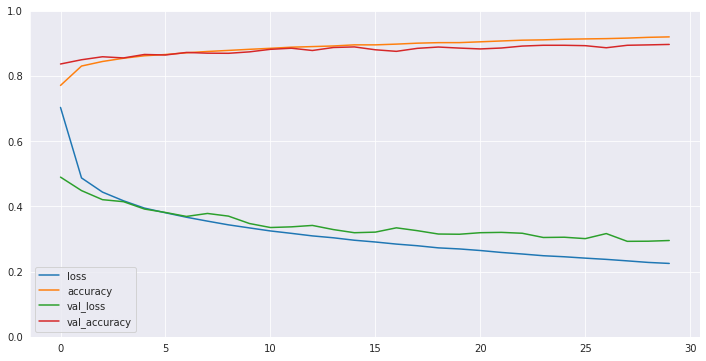

In [22]:
## plotting the history_df dataframe
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
history_df.plot(figsize=(12,6))
plt.grid(True)
plt.gca().set_ylim(0,1) # ser the vertical range to 0-1
plt.show();

In [23]:
## evaluating the model on the test set
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 70.7986 - accuracy: 0.8376


[70.79859161376953, 0.8375999927520752]

In [24]:
## using the trained model to make predictions
## since we don't have actual new instances, we will just use the some of the instanes from the test set

X_new = X_test[10:20]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [25]:
## if we do not want class probabilities but the rather the class indices then we will use the argmax method
import numpy as np
y_pred = np.argmax(y_proba, axis=1)

In [26]:
y_pred

array([4, 5, 5, 3, 4, 1, 2, 2, 8, 0])

In [27]:
## let's check if the classifier classified the images correctly
y_test[10:20]

array([4, 5, 7, 3, 4, 1, 2, 4, 8, 0], dtype=uint8)

In [29]:
## getting the names of the predicted fashion items
np.array(class_names)[y_pred]

array(['Coat', 'Sandal', 'Sandal', 'Dress', 'Coat', 'Trouser', 'Pullover',
       'Pullover', 'Bag', 'T-shirt/top'], dtype='<U11')